In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

In [2]:
from utilities import *

In [3]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer

In [4]:
ble = read_ble('../Data/ble.csv')
pin = read_pin('../Data/pin.csv')

In [5]:
data = read_data('../Data/rssi_2.csv')
data

All beacons: ['0117C55D14E4']
Selecting all


,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2020-01-09 07:53:05.386,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-09 07:53:05.399,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-09 07:53:05.449,V1_24,-89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-09 07:53:05.808,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN
4,2020-01-09 07:53:05.809,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,2020-01-09 09:24:45.530,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN
63703,2020-01-09 09:24:45.641,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63704,2020-01-09 09:24:45.642,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,-83.0,NaN,NaN,NaN,NaN,NaN,NaN
63705,2020-01-09 09:24:45.667,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3646.000000,3537.000000,3099.000000,4517.000000,3661.000000,4564.000000,4604.00000,3901.000000,6579.000000,2505.000000,4971.000000,3899.000000,5547.000000,5015.000000,5494.000000,2709.000000,3271.000000
mean,-72.730938,-74.122420,-76.493385,-71.553907,-72.016389,-73.576468,-74.93397,-73.868752,-77.253686,-77.755289,-75.916516,-72.306745,-68.139535,-75.568096,-73.909174,-81.865264,-74.347906
std,8.090962,6.738867,6.554893,8.777439,6.530111,8.030736,9.10565,8.739254,11.568648,8.906306,9.651288,7.310162,7.839906,9.398742,8.537659,8.919793,8.096212
min,-97.000000,-98.000000,-98.000000,-98.000000,-96.000000,-98.000000,-98.00000,-98.000000,-98.000000,-98.000000,-98.000000,-97.000000,-96.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-77.000000,-77.000000,-80.000000,-78.000000,-77.000000,-80.000000,-81.00000,-80.000000,-87.000000,-84.000000,-84.000000,-77.000000,-73.000000,-82.000000,-80.000000,-90.000000,-80.000000
50%,-72.000000,-73.000000,-76.000000,-71.000000,-72.000000,-73.000000,-75.00000,-73.000000,-78.000000,-77.000000,-75.000000,-72.000000,-66.000000,-75.000000,-74.000000,-82.000000,-73.000000
75%,-68.000000,-69.000000,-72.000000,-64.000000,-67.000000,-66.000000,-70.00000,-68.000000,-70.000000,-71.000000,-67.000000,-66.500000,-62.000000,-70.000000,-67.000000,-72.000000,-69.000000
max,-59.000000,-63.000000,-61.000000,-56.000000,-60.000000,-59.000000,-54.00000,-56.000000,-55.000000,-63.000000,-61.000000,-55.000000,-54.000000,-57.000000,-55.000000,-67.000000,-59.000000


In [7]:
rolling_win = 30
data.sort_values("time", inplace=True)
data_rolled = data.groupby("location").rolling(rolling_win, min_periods=1).mean().reset_index()

In [8]:
data_imputed = data_rolled.set_index("location").groupby("location").ffill()
data_imputed.fillna(-100, inplace=True)
data_imputed.reset_index(inplace=True)

In [9]:
data_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,24997,-72.000000,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-100.000000,-100.000000,-100.000000,-100.0,-100.0
1,V1_10,24998,-72.000000,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-65.000000,-100.000000,-100.000000,-100.0,-100.0
2,V1_10,24999,-72.000000,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-62.500000,-100.000000,-100.000000,-100.0,-100.0
3,V1_10,25000,-72.000000,-76.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-62.500000,-100.000000,-100.000000,-100.0,-100.0
4,V1_10,25001,-72.000000,-76.0,-100.0,-66.0,-100.0,-100.0,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.000000,-62.500000,-100.000000,-100.000000,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,V1_9,31039,-75.500000,-87.5,-81.0,-72.2,-85.0,-91.0,-83.5,-62.000000,-96.0,-82.0,-91.0,-72.500000,-76.333333,-72.750000,-82.333333,-94.0,-67.0
63703,V1_9,31040,-75.500000,-87.5,-81.0,-72.2,-85.0,-89.0,-83.5,-62.000000,-96.0,-82.0,-91.0,-72.333333,-76.333333,-70.333333,-82.333333,-94.0,-67.0
63704,V1_9,31041,-75.500000,-87.5,-81.0,-72.2,-85.0,-89.0,-83.5,-62.000000,-96.0,-82.0,-91.0,-72.500000,-76.333333,-70.333333,-82.000000,-94.0,-67.0
63705,V1_9,31042,-75.500000,-87.5,-81.0,-72.2,-85.0,-89.0,-83.5,-61.333333,-96.0,-82.0,-91.0,-72.500000,-76.000000,-70.333333,-82.000000,-94.0,-67.0


In [10]:
data_imputed["X"] = data_imputed["location"].apply(lambda x: pin[x]["X"])
data_imputed["Y"] = data_imputed["location"].apply(lambda x: pin[x]["Y"])

In [11]:
data_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,24997,-72.000000,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,...,-100.0,-100.0,-100.000000,-100.000000,-100.000000,-100.000000,-100.0,-100.0,11.17660,5.29753
1,V1_10,24998,-72.000000,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,...,-100.0,-100.0,-100.000000,-65.000000,-100.000000,-100.000000,-100.0,-100.0,11.17660,5.29753
2,V1_10,24999,-72.000000,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,...,-100.0,-100.0,-100.000000,-62.500000,-100.000000,-100.000000,-100.0,-100.0,11.17660,5.29753
3,V1_10,25000,-72.000000,-76.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.000000,...,-100.0,-100.0,-100.000000,-62.500000,-100.000000,-100.000000,-100.0,-100.0,11.17660,5.29753
4,V1_10,25001,-72.000000,-76.0,-100.0,-66.0,-100.0,-100.0,-100.0,-100.000000,...,-100.0,-100.0,-100.000000,-62.500000,-100.000000,-100.000000,-100.0,-100.0,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,V1_9,31039,-75.500000,-87.5,-81.0,-72.2,-85.0,-91.0,-83.5,-62.000000,...,-82.0,-91.0,-72.500000,-76.333333,-72.750000,-82.333333,-94.0,-67.0,8.17867,5.28213
63703,V1_9,31040,-75.500000,-87.5,-81.0,-72.2,-85.0,-89.0,-83.5,-62.000000,...,-82.0,-91.0,-72.333333,-76.333333,-70.333333,-82.333333,-94.0,-67.0,8.17867,5.28213
63704,V1_9,31041,-75.500000,-87.5,-81.0,-72.2,-85.0,-89.0,-83.5,-62.000000,...,-82.0,-91.0,-72.500000,-76.333333,-70.333333,-82.000000,-94.0,-67.0,8.17867,5.28213
63705,V1_9,31042,-75.500000,-87.5,-81.0,-72.2,-85.0,-89.0,-83.5,-61.333333,...,-82.0,-91.0,-72.500000,-76.000000,-70.333333,-82.000000,-94.0,-67.0,8.17867,5.28213


In [12]:
def plot_RSSI_Coor(data, coor, scanner):
#     for loc in data['location'].unique():
#         plt.scatter(data[data['location'] == loc][coor], data[data['location'] == loc][scanner], alpha=1, label=loc)
    plt.scatter(data[coor], data[scanner], alpha=0.1)
    plt.xlabel(coor)
    plt.ylabel('RSSI')
    plt.title('{}\nLocation: ({:.2f}, {:.2f})'.format(scanner, ble[scanner]['X'], ble[scanner]['Y']))
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

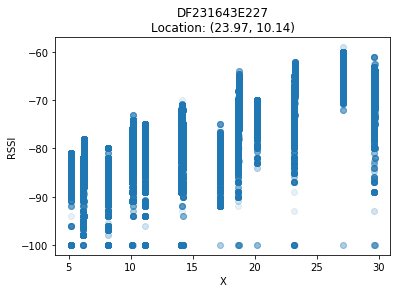

In [13]:
plot_RSSI_Coor(data_imputed, 'X', 'DF231643E227')

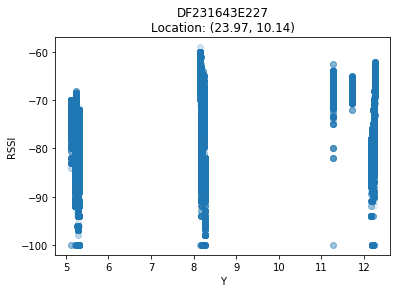

In [14]:
plot_RSSI_Coor(data_imputed, 'Y', 'DF231643E227')

In [15]:
R1824 = data_imputed[['DF231643E227', 'X', 'Y']].copy()

In [16]:
dx = R1824['X'] - ble['DF231643E227']['X']
dy = R1824['Y'] - ble['DF231643E227']['Y']
R1824['D'] = np.sqrt(np.square(dx) + np.square(dy))

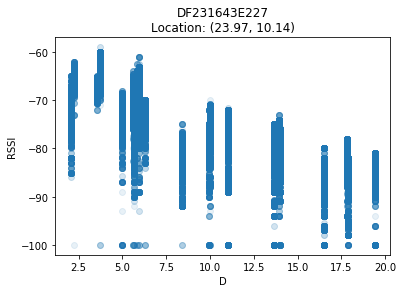

In [17]:
plot_RSSI_Coor(R1824, 'D', 'DF231643E227')

In [18]:
reg = LinearRegression()
reg.fit(R1824['D'].values.reshape((-1,1)), R1824['DF231643E227'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

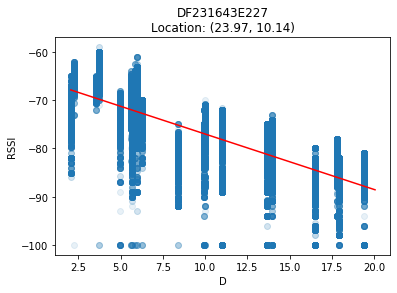

In [19]:
plot_RSSI_Coor(R1824, 'D', 'DF231643E227')
x = np.arange(R1824['D'].min(), R1824['D'].max() + 1).reshape((-1,1))
plt.plot(x, reg.predict(x), c='r')

In [20]:
for s in scanners:
    scanner = data_imputed[[s, 'X', 'Y']].copy()
    dx = scanner['X'] - ble[s]['X']
    dy = scanner['Y'] - ble[s]['Y']
    scanner['D'] = np.sqrt(np.square(dx) + np.square(dy))
    reg = LinearRegression()
    reg.fit(scanner['D'].values.reshape((-1,1)), scanner[s])
    joblib.dump(reg, '../Models/linear_distance_models_2/{}.joblib'.format(s))